Öznitelik veriler sayısal değil de kategorik olabilir.

In [3]:
data=[{'not':85,'kardes': 4,'ders': 'mat'},
{'not':70,'kardes': 3,'ders': 'ing'},
{'not':65,'kardes': 3,'ders': 'mat'},
{'not':60,'kardes': 2,'ders': 'fiz'}]

basit bir sayısal kodlama ile haritayabiliriz. {'mat':1,'ing':2,'fiz':3} Fakat bu yaklaım sklearnde kullanılmaz. Büyükten küçüğe sıralamış gibi algılar. Sklearnde DictVectorize kullanılır.

In [5]:
from sklearn.feature_extraction import DictVectorizer

In [8]:
vek= DictVectorizer(sparse=False,dtype=int)

In [9]:
vek.fit_transform(data)

array([[ 0,  0,  1,  4, 85],
       [ 0,  1,  0,  3, 70],
       [ 0,  0,  1,  3, 65],
       [ 1,  0,  0,  2, 60]])

In [12]:
vek.get_feature_names()

['ders=fiz', 'ders=ing', 'ders=mat', 'kardes', 'not']

Bu yöntem ile sütuna ait dersleri sırasıyla sütuna atadık. Kategori çoksa veri büyür. Sparse çıktı daha kullanışlıdır. 

In [14]:
vek= DictVectorizer(sparse=True,dtype=int)
vek.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

12 bileşenden oluşan matrix olduğunu söyledi.

Şimdi textlerin nasıl sayısal veriye çevrilir. Örneğin kelime sayısına göre sayıllaştırılabilir. 

In [16]:
veri=['hava iyi','iyi insan','hava bozuk']

In [17]:
from sklearn.feature_extraction.text import CountVectorizer #verideki kelimeleri sütun adı yaptık.

In [18]:
vek= CountVectorizer()

In [20]:
X= vek.fit_transform(veri)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [21]:
# dönüştürdüğümüz veriyi daha iyi görmek için pandası kullanalım.

In [24]:
import pandas as pd

In [26]:
pd.DataFrame(X.toarray(),columns=vek.get_feature_names())

,bozuk,hava,insan,iyi
0,0,1,0,1
1,0,0,1,1
2,1,1,0,0


In [27]:
#öznitelik türetme 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x=np.array([1,2,3,4,5])
y=np.array([5,3,1,2,7])

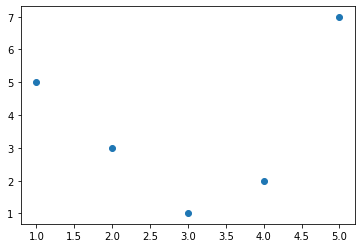

In [31]:
plt.scatter(x,y)

In [32]:
#veriye uygun doğru yapalımk
from sklearn.linear_model import LinearRegression

In [33]:
X=x[:,np.newaxis]
model= LinearRegression().fit(X,y)

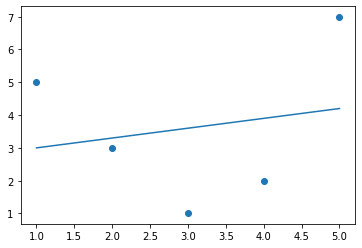

In [35]:
y_fit=model.predict(X)
plt.scatter(x,y)
plt.plot(x,y_fit)

İlişikiyi anlamak için daha gelişmiş model gerekmektedir. 

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
pol=PolynomialFeatures(degree=3, include_bias=False)

In [44]:
X2=pol.fit_transform(X)
X2 # türetilen matriks 1.sütun X, 2. sütun X^2, 3. sütun X^3 verir.
#X2  verisini kullanarak modeli kuralım.


array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [50]:
model= LinearRegression().fit(X2,y)

In [51]:
y_fit=model.predict(X2)

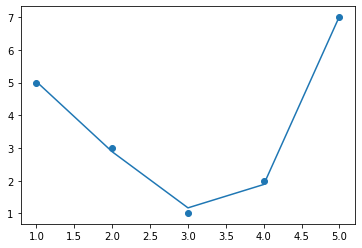

In [55]:
plt.scatter(x,y)
plt.plot(x,y_fit) #modeli iyileştirmiş olduk.

Öznitelik mühendisliği kayıp verileri (NAN) ele alır. 

In [57]:
from numpy import nan
X=np.array([[1,nan,3],[5,6,9],[4,5,2],[4,6,nan],[9,8,1]])
y=np.array([10,13,-2,7,-6])